# Build a recommendation system

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import pickle

In [3]:
import numpy as np

In [4]:
with open('../data/articles_embeddings.pickle','rb') as embedd:
    embedding=pickle.load(embedd)


In [5]:
embedding.shape

(364047, 250)

## Data Analyse

In [6]:
article_meta=pd.read_csv('../data/articles_metadata.csv')
click_sample=pd.read_csv('../data/clicks_sample.csv')

In [7]:
article_meta

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162
...,...,...,...,...,...
364042,364042,460,1434034118000,0,144
364043,364043,460,1434148472000,0,463
364044,364044,460,1457974279000,0,177
364045,364045,460,1515964737000,0,126


In [8]:
article_meta.words_count.value_counts()

176     3485
182     3480
179     3463
178     3458
174     3456
        ... 
556        1
625        1
2798       1
767        1
841        1
Name: words_count, Length: 866, dtype: int64

Text(0.5, 1.0, 'Words per article')

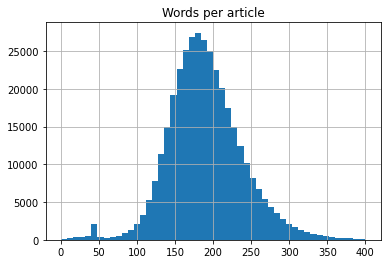

In [9]:
article_meta.words_count.hist(bins=50, range=(0,400))
plt.title('Words per article')

- 5 variables :

Article, Category article, time created, number of words and publisher ID 

In [10]:
click_sample

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1878,705,1506828968165442,1506828968000,2,119592,1506830912301,4,1,17,1,21,2
1879,705,1506828968165442,1506828968000,2,284847,1506830942301,4,1,17,1,21,2
1880,706,1506828979881443,1506828979000,3,108854,1506829027334,4,3,2,1,25,1
1881,706,1506828979881443,1506828979000,3,96663,1506829095732,4,3,2,1,25,1


In [11]:
session_size=click_sample.session_size.value_counts()

In [12]:
session_size

2     904
3     489
4     168
5     140
6      48
7      42
8      24
24     24
9      18
16     16
10     10
Name: session_size, dtype: int64

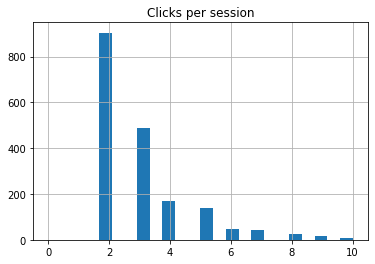

In [13]:
click_sample.session_size.hist(bins=24, range=(0,10))
plt.title('Clicks per session');


## Try differents recommendation system

### Group every click file

In [14]:

import glob

path = r'../data/clicks' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

clicks = pd.concat(li, axis=0, ignore_index=True)

In [15]:
clicks[clicks.user_id==0]

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
1287361,0,1507340000920377,1507340000000,2,96755,1507340033155,4,3,20,1,20,2
1287362,0,1507340000920377,1507340000000,2,313996,1507340063155,4,3,20,1,20,2
1352197,0,1507385847186982,1507385847000,2,160158,1507388090915,4,3,20,1,20,2
1352198,0,1507385847186982,1507385847000,2,233470,1507388120915,4,3,20,1,20,2
1535240,0,1507514030209212,1507514030000,2,87224,1507514056617,4,3,20,1,20,2
1535241,0,1507514030209212,1507514030000,2,87205,1507514086617,4,3,20,1,20,2


In [16]:
from datetime import datetime

timestamp = 1507514086
timestamp1 = 1507340033

dt_object = datetime.fromtimestamp(timestamp)
dt_object1 = datetime.fromtimestamp(timestamp1)
print("dt_object =", dt_object)
print("dt_object =", dt_object1)


dt_object = 2017-10-09 03:54:46
dt_object = 2017-10-07 03:33:53


In [17]:
df = clicks.groupby('user_id').agg(
    LIST_click_article_id = ('click_article_id', lambda x: list(x)),
)
df

,LIST_click_article_id
user_id,
0,"[157541, 68866, 96755, 313996, 160158, 233470,..."
1,"[235840, 96663, 59758, 160474, 285719, 156723,..."
2,"[119592, 30970, 30760, 209122]"
3,"[236065, 236294, 234686, 233769, 235665, 23513..."
4,"[48915, 44488, 195887, 195084, 63307, 336499, ..."
...,...
322892,"[42567, 39894]"
322893,"[50644, 36162]"
322894,"[36162, 168401]"


In [18]:
article_meta

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162
...,...,...,...,...,...
364042,364042,460,1434034118000,0,144
364043,364043,460,1434148472000,0,463
364044,364044,460,1457974279000,0,177
364045,364045,460,1515964737000,0,126


 Regarde sur chaque utilisateur, les catégories des articles cliqués et les ajoutes à la dataframe

In [19]:
article_meta[article_meta.article_id == 364042].category_id.values[0]

460

In [12]:
df['categories'] = ''

for index, row in df.iterrows():
        
    _list_row = []
    for article in row.LIST_click_article_id:
        _list_row.append(article_meta[article_meta.article_id == article].category_id.values[0])
        df.loc[index]['categories']=_list_row
    
   

AttributeError: 'Series' object has no attribute 'LIST_click_article_id'

30 minutes pour run, on va sauvegarder notre csv.

In [ ]:
df.to_csv('df.csv')

NameError: name 'df' is not defined

In [20]:
df=pd.read_csv('../data/df.csv')


In [21]:
df

,user_id,LIST_click_article_id
0,0,"[157541, 68866, 96755, 313996, 160158, 233470,..."
1,1,"[235840, 96663, 59758, 160474, 285719, 156723,..."
2,2,"[119592, 30970, 30760, 209122]"
3,3,"[236065, 236294, 234686, 233769, 235665, 23513..."
4,4,"[48915, 44488, 195887, 195084, 63307, 336499, ..."
...,...,...
322892,322892,"[42567, 39894]"
322893,322893,"[50644, 36162]"
322894,322894,"[36162, 168401]"
322895,322895,"[289197, 63746]"


## Surprise 

In [22]:
pip install surprise

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files\Python 3.9.7\python.exe -m pip install --upgrade pip' command.


In [23]:
dataframe = clicks.merge(article_meta, left_on='click_article_id', right_on='article_id')

In [24]:
dataframe

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2,157541,281,1506800518000,0,280
1,20,1506825727279757,1506825727000,2,157541,1506836548634,4,1,17,1,9,1,157541,281,1506800518000,0,280
2,44,1506826139185781,1506826139000,5,157541,1506857278141,4,1,17,1,12,1,157541,281,1506800518000,0,280
3,45,1506826142324782,1506826142000,2,157541,1506827309970,4,1,17,1,17,1,157541,281,1506800518000,0,280
4,76,1506826463226813,1506826463000,2,157541,1506828823469,4,3,2,1,21,1,157541,281,1506800518000,0,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988176,195186,1508210422411129,1508210422000,4,2221,1508210469562,4,3,2,1,1,1,2221,1,1508192469000,0,103
2988177,75658,1508210696185183,1508210696000,4,271117,1508210951703,4,1,17,1,4,2,271117,399,1504276061000,0,156
2988178,217129,1508210976336246,1508210976000,2,20204,1508210990810,4,3,2,1,21,5,20204,9,1491934410000,0,242
2988179,217129,1508210976336246,1508210976000,2,70196,1508211020810,4,3,2,1,21,5,70196,136,1491298495000,0,206


In [25]:
dataframe = dataframe[['user_id', 'article_id', 'category_id']]

In [26]:
dataframe

,user_id,article_id,category_id
0,0,157541,281
1,20,157541,281
2,44,157541,281
3,45,157541,281
4,76,157541,281
...,...,...,...
2988176,195186,2221,1
2988177,75658,271117,399
2988178,217129,20204,9
2988179,217129,70196,136


In [31]:
series

user_id  category_id
0        136            1
         186            2
         209            1
         281            2
         375            1
                       ..
322894   297            1
322895   133            1
         418            1
322896   26             1
         281            1
Length: 1882302, dtype: int64

## Create Rating

In [29]:
series = dataframe.groupby(['user_id', 'category_id']).size()
user_rating_matrix = series.to_frame()
user_rating_matrix = user_rating_matrix.reset_index()
user_rating_matrix.rename(columns = {0:'rate'}, inplace = True)

In [30]:
user_rating_matrix[user_rating_matrix.category_id==268]


,user_id,category_id,rate
218187,19706,268,1
778222,81642,268,1
1794083,287658,268,2
1833041,301932,268,1
1870579,317511,268,1


In [32]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate

In [33]:
reader = Reader(rating_scale=(1,10))
_x = user_rating_matrix.loc[user_rating_matrix.rate > 1]
data = Dataset.load_from_df(_x[['user_id', 'category_id', 'rate']], reader)

# Reader class use to parse a file containing ratings

In [34]:
x

NameError: name 'x' is not defined

### Predict

In [35]:

train, test = train_test_split(data, test_size=0.25)


In [36]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(train)

In [37]:
predictions = algo.test(test)


In [38]:
accuracy.rmse(predictions)

RMSE: 7.5297


7.529706774154791

In [39]:
from collections import defaultdict


def gtop_n(predictions, n=10):
    

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [40]:
top_n = gtop_n(predictions)

In [41]:
def findRecom(dic, userId):
    res = []
    query = dic[userId]
    for uid, user_ratings in query:
        res.append(uid)
    return res

## Find category 

In [42]:
findRecom(top_n, 9032)

[399]

## content based

In [43]:
embedding

array([[-0.16118301, -0.95723313, -0.13794445, ..., -0.231686  ,
         0.5974159 ,  0.40962312],
       [-0.52321565, -0.974058  ,  0.73860806, ...,  0.18282819,
         0.39708954, -0.83436364],
       [-0.61961854, -0.9729604 , -0.20736018, ..., -0.44758022,
         0.8059317 , -0.28528407],
       ...,
       [-0.25139043, -0.9762427 ,  0.58609664, ..., -0.14372464,
         0.06809307, -0.7050104 ],
       [ 0.22434181, -0.92328775, -0.38174152, ...,  0.6871319 ,
        -0.5315117 ,  0.01072566],
       [-0.25713393, -0.9946313 ,  0.9837918 , ...,  0.98387307,
        -0.8381829 , -0.1792827 ]], dtype=float32)

In [44]:
from operator import itemgetter

def find_top_n_indices(data, top=5):
    indexed = enumerate(data)
    sorted_data = sorted(indexed, 
                         key=itemgetter(1), 
                         reverse=True) 
    return [d[0] for d in sorted_data[:top]] 

In [45]:
def recommendFromArticle(article_id, top):
    score = []
    for i in range(0, len(embedding)):
        if(article_id != i):
            cos_sim = np.dot(embedding[article_id], embedding[i])/(np.linalg.norm(embedding[article_id])*np.linalg.norm(embedding[i]))
            score.append(cos_sim)
            
    _best_scores = find_top_n_indices(score, top)
            
    return _best_scores

Top articles similar with the choosen article.

In [46]:
recommendFromArticle(article_id, 10)


NameError: name 'article_id' is not defined

In [ ]:
df

,user_id,LIST_click_article_id
0,0,"[157541, 68866, 96755, 313996, 160158, 233470,..."
1,1,"[235840, 96663, 59758, 160474, 285719, 156723,..."
2,2,"[119592, 30970, 30760, 209122]"
3,3,"[236065, 236294, 234686, 233769, 235665, 23513..."
4,4,"[48915, 44488, 195887, 195084, 63307, 336499, ..."
...,...,...
322892,322892,"[42567, 39894]"
322893,322893,"[50644, 36162]"
322894,322894,"[36162, 168401]"
322895,322895,"[289197, 63746]"


In [ ]:
for i in x:
    print(recommendFromArticle(i,5))

[87277, 86143, 87675, 87030, 87426]
[284637, 86733, 86384, 105557, 98308]
[233385, 234699, 235382, 234402, 236218]
[157384, 158157, 157951, 70966, 161445]
[313995, 311966, 312143, 314385, 309865]
[92427, 93252, 92408, 90405, 91608]
[358036, 159169, 65360, 152053, 153875]
[157514, 159283, 157554, 162368, 156355]


In [47]:
import random

In [ ]:
random.choice(x)

157541

In [ ]:
len(df.loc[0]['LIST_click_article_id'])
var=df.loc[0]['LIST_click_article_id']
var = var.replace('[', '').replace(']', '').replace(',', '').split()
x=[int(i)for i in var]

In [ ]:
len(x)

8

Final Recommandation Engine

In [48]:
def reco_base(user_id):
    li=[]
    var=df.loc[user_id]['LIST_click_article_id']
    var = var.replace('[', '').replace(']', '').replace(',', '').split()
    x=[int(i)for i in var]
    
    x.reverse()  # Avoir les articles les plus récents en premier
    if len(x)>=5:
        for article in x:
            li.append(random.choice(recommendFromArticle(article,10)))
            if len(li)==5:
                break
    else :
        while len(li)<5:
            for article in x:
            
                li.append(random.choice(recommendFromArticle(article,10)))
                if len(li)==5:
                    break
                           
    return li

In [49]:
reco_base(322892)

[159299, 72508, 42183, 42237, 42689]

JSON Test for api

In [ ]:
import json

# some JSON:
x =  '{ "id":30}'

# parse x:
y = json.loads(x)

# the result is a Python dictionary:
print(y["age"])

30


In [ ]:
id=y["age"]

In [ ]:
reco_base(user_id)

[30917, 168838, 225055, 66452, 275139]

In [ ]:
x[0]

'{'

# Create Our recommandation dataframe

In [62]:
data = []
for i in range (0,10): #We will only make a sample, cause of time needed
    rec=reco_base(i)
    data.append([i,rec])
df_reco = pd.DataFrame(data, columns=["userId","Recommandation"])


In [64]:
df_reco

,userId,Recommandation
0,0,"[85768, 86384, 235382, 161445, 314780]"
1,1,"[233829, 36290, 178585, 328209, 282964]"
2,2,"[205848, 31071, 31713, 118495, 207141]"
3,3,"[120539, 230753, 236283, 234282, 292861]"
4,4,"[271573, 337085, 63282, 192410, 188928]"
5,5,"[149529, 155009, 65978, 69349, 50644]"
6,6,"[206929, 202458, 105446, 250640, 99561]"
7,7,"[22024, 151770, 277109, 35729, 345760]"
8,8,"[22992, 235078, 214080, 95793, 329791]"
9,9,"[291636, 338078, 281519, 285320, 292477]"


In [61]:
print(df_reco[df_reco.userId==0]["Recommandation"].values)

[list([87277, 105557, 233385, 161445, 312143])]


In [63]:
df_reco.to_csv('df_reco') #Save it to use it